# GME Research


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import os

os.chdir('/Users/andrei/PycharmProjects/TWITTER_F')

## Подготовка данных

На данном этапе нам нужно прочитать наши данные и провести дополнительные преобразования для упрощения анализа.

Среди основных преобразований - преобразование даты и выделение ключевых.

По предварительно сохраненным данным, нам нужно провести исследовательский анализ и выделить основные характеристики набора данных

In [13]:
data = pd.read_csv('data/SELECT_FINAL_F.csv',\
                   sep='\t',parse_dates=['date_time','date_only'], lineterminator ='\n')
data.head()

,id,conversation_id,user_id,username,tweet,photos,replies_count,retweets_count,likes_count,hashtags,video,thumbnail,parent_tweet_id,date_time,date_only,quote_url,link,reply_to_scr_name,reply_to_name,parentie
0,1349143722940919808,1169297966303260672,1169297966303260672,qod_gme,@MaryTravels78 If it’s any consolation ... it ...,0,0,0,0,[],0,0,1320196554821668864,2021-01-13 02:58:24+03:00,2021-01-13 00:00:00+03:00,NaN,https://twitter.com/QOD_GME/status/13491437229...,MaryTravels78,Mary Inge,1320196554821668865
1,1349143720847953923,376727981,376727981,trey50daniel,@jennkruza @RodAlzmann About to be the stimmy ...,0,0,0,8,[],0,0,26795056,2021-01-13 02:58:23+03:00,2021-01-13 00:00:00+03:00,NaN,https://twitter.com/Trey50Daniel/status/134914...,jennkruza,jenn kruza,26795056
2,1349143059120881664,1320196554821668864,1320196554821668864,marytravels78,"@QOD_GME Of not, there should be...",0,1,0,0,[],0,0,1169297966303260672,2021-01-13 02:55:45+03:00,2021-01-13 00:00:00+03:00,NaN,https://twitter.com/MaryTravels78/status/13491...,QOD_GME,QOD: Question of the Day,1169297966303260672
3,1349140350628220934,967494738369753216,967494738369753216,dantzfrye,I start my day off everyday with 0$ But I won’...,0,0,0,0,['gme'],0,0,0,2021-01-13 02:45:00+03:00,2021-01-13 00:00:00+03:00,NaN,https://twitter.com/DantzFrye/status/134914035...,NaN,NaN,0
4,1349138601058193410,83749263,83749263,tmyrbrgh,@investing_city About to to be $GME Gamestop,0,0,0,2,[],0,0,2961979644,2021-01-13 02:38:02+03:00,2021-01-13 00:00:00+03:00,NaN,https://twitter.com/tmyrbrgh/status/1349138601...,investing_city,Ryan Reeves,2961979644


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602140 entries, 0 to 1602139
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype                                
---  ------             --------------    -----                                
 0   id                 1602140 non-null  int64                                
 1   conversation_id    1602140 non-null  int64                                
 2   user_id            1602140 non-null  int64                                
 3   username           1602140 non-null  object                               
 4   tweet              1602140 non-null  object                               
 5   photos             1602140 non-null  int64                                
 6   replies_count      1602140 non-null  int64                                
 7   retweets_count     1602140 non-null  int64                                
 8   likes_count        1602140 non-null  int64                                
 9   ha

Данные загружены правильно. Теперь преобразуем столбец, содержащий время публикации в формате date_time

In [ ]:

data['date_time'] = pd.to_datetime(data['created_at'].replace('MSK', '+04:00'),\
                                   format='%Y%m%d %H:%M:%S',infer_datetime_format=True)
data['date_only'] = data['date_time'].dt.normalize()


In [ ]:

new_data = data.drop('created_at', axis = 1)


In [ ]:
new_data.to_csv('data_main/SELECT_DATA_FINAL.csv',\
                   sep='\t',index= False)


## Исследовательский анализ данных

На данном этапе нам предстоит вывести основные параметры наших данных и представить их в графическом виде для удобства восприятия.

Основная цель - более подробно описать наши данные, сделать предварительыне выводы и сформировать рабочие гипотезы.

Отберем рабочие колонки и сформируем отчет-профайл по числовым столбцам:

In [ ]:
cols_profile = ['id','user_id','date_only','photos','replies_count','retweets_count','likes_count','video','reply_to_scr_name']


In [10]:

profile = ProfileReport(data[cols_profile], title="Pandas Profiling Report")

profile.to_notebook_iframe()


/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

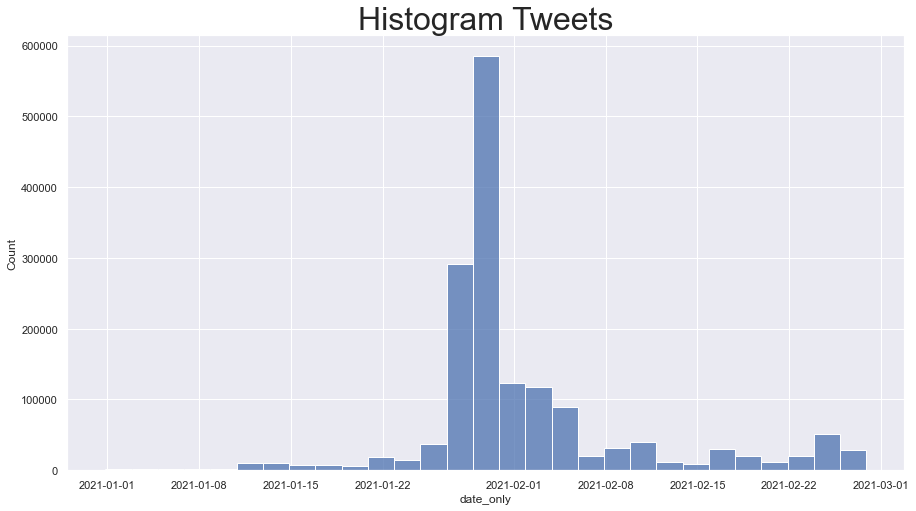

In [22]:
sns.set_theme()
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Histogram Tweets', fontsize = 32)

fig = sns.histplot(data=data['date_only'], binwidth=2)
plt.savefig('dist_plot.png')
plt.show()


***Построим описательную матрицу наших числовых характеристик для большей наглядности:***

In [12]:
data[cols_profile].describe()

,id,user_id,photos,replies_count,retweets_count,likes_count,video
count,1.602140e+06,1.602140e+06,1.602140e+06,1.602140e+06,1.602140e+06,1.602140e+06,1.602140e+06
mean,1.356261e+18,5.229818e+17,1.415014e-01,1.016937e+00,2.217580e+00,1.696312e+01,1.346767e-01
std,3.119084e+15,5.841874e+17,4.058891e-01,2.625556e+01,1.698350e+02,1.288912e+03,3.413781e-01
min,1.344750e+18,6.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.354570e+18,3.016230e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.355243e+18,3.140693e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.356646e+18,1.178337e+18,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
max,1.365452e+18,1.365358e+18,4.000000e+00,1.269800e+04,1.246430e+05,9.582480e+05,1.000000e+00


### Краткие сведения о данных:

В ходе извлечения и предварительного преобразования датасеты мы получили такие параметры нашего датасета

* Общее количество исследуемых твиттов - 1,602,140.

* Уникальных пользователей - 701,184

* Самое большое количество твитов приходится на период 27-29 января. Возможная причина - скандал насчет блокировки аккаунтов в приложении Robinhood.

* Большая часть твитов приходится на 29 января - день ввода ограничений для инвесторов в приложении.

* Присуствует умеренная связь (коэффициент корреляции) между количество ретвитов и лайками (сильновыраженная связь), а также между наличие фото-видео контента (связь средней выраженности):

* Максимальное число лайков - 968248, медианное число - 1

* На твиты 205167 человек есть ответы в данном наборе данных,

* Некоторые твиты имеют серьезный перевес по ответам и количеству лайков - скорее всего - это твиты с аккаунтов известных людей в твитере.

***Сохраним отчет в отдельном файле:***

In [26]:
profile.to_file('/Users/andrei/PycharmProjects/TWITTER_F/notebooks/EDA_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
data['tokens'] = data['tweet'].str.split()
data['len_tweets'] = data['tokens'].apply(lambda x: len(x))

In [22]:
all_words = [word for tokens in data['tokens'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in list(data['tokens'])]
vocab = sorted(list(set(all_words)))

print('{} всего слов, с длиной словаря {}'.format(len(all_words), len(vocab)))
print('Максимальная длина твита {}'.format(max(tweet_lengths)))

34406499 всего слов, с длиной словаря 1520437
Максимальная длина твита 137


/opt/homebrew/Caskroom/miniforge/base/envs/py-39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


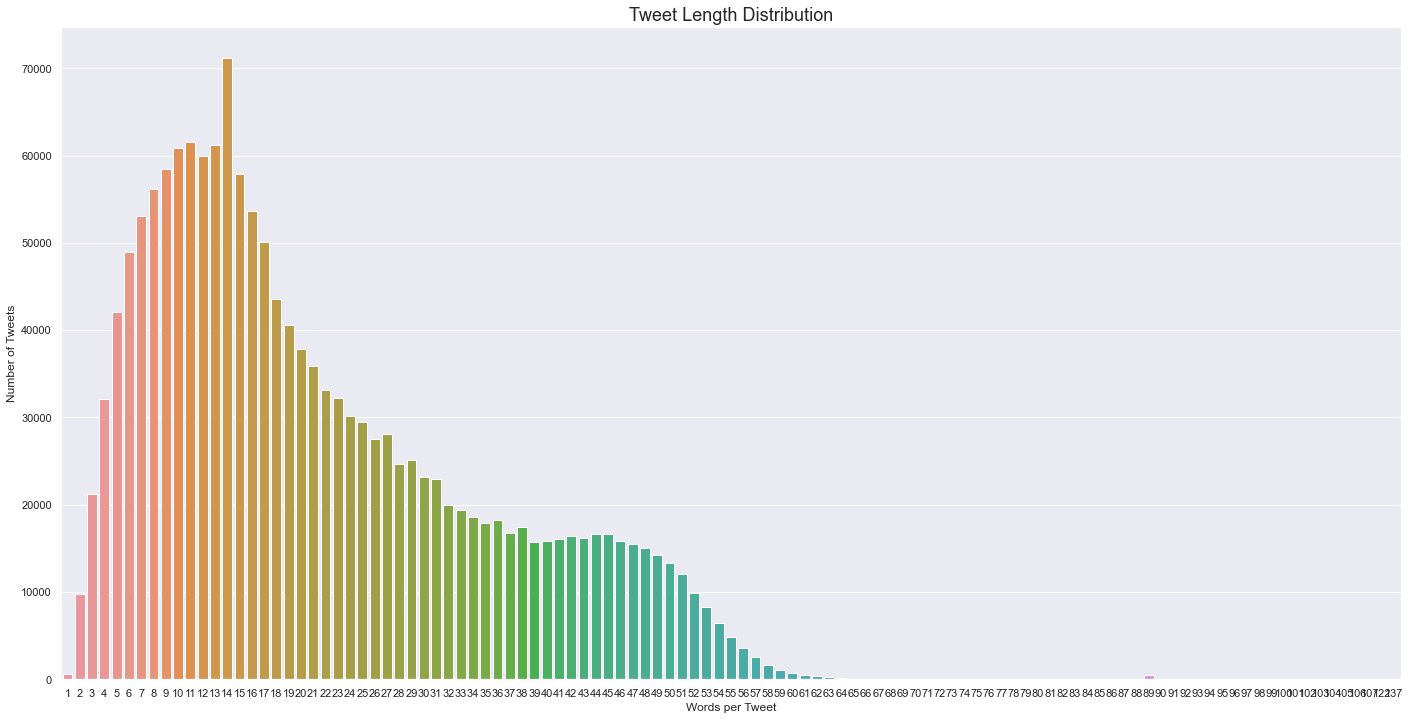

In [25]:
sns.set_theme()
plt.figure(figsize = (24,12))
sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.savefig('length_dist.png')
plt.show()

**Вычисление средней длины Твитов**

In [27]:
np.mean(tweet_lengths)


21.475338609609647